In [ ]:
import pandas as pd
df = pd.read_csv("X data.csv")
print(df)

The given dataset has numbers as category,converted that into words.

In [2]:
df['Sentiment'] = df['category'].map({
    1: 'Positive',
    0: 'Neutral',
    -1: 'Negative'
})
print(df)

                                               clean_text  category Sentiment
0       when modi promised “minimum government maximum...      -1.0  Negative
1       talk all the nonsense and continue all the dra...       0.0   Neutral
2       what did just say vote for modi  welcome bjp t...       1.0  Positive
3       asking his supporters prefix chowkidar their n...       1.0  Positive
4       answer who among these the most powerful world...       1.0  Positive
...                                                   ...       ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0  Negative
162976  dear rss terrorist payal gawar what about modi...      -1.0  Negative
162977  did you cover her interaction forum where she ...       0.0   Neutral
162978  there big project came into india modi dream p...       0.0   Neutral
162979  have you ever listen about like gurukul where ...       1.0  Positive

[162980 rows x 3 columns]


Count of positive,Negative and neutral statements.

In [3]:
print(df['Sentiment'].value_counts())


Sentiment
Positive    72250
Neutral     55213
Negative    35510
Name: count, dtype: int64


Generating Bar Graph with the help of counts.

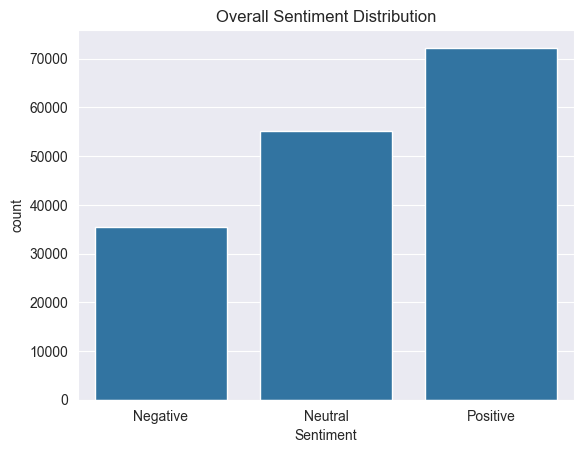

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()


In [5]:
print(df['Sentiment'].value_counts(normalize=True) * 100)


Sentiment
Positive    44.332497
Neutral     33.878618
Negative    21.788885
Name: proportion, dtype: float64


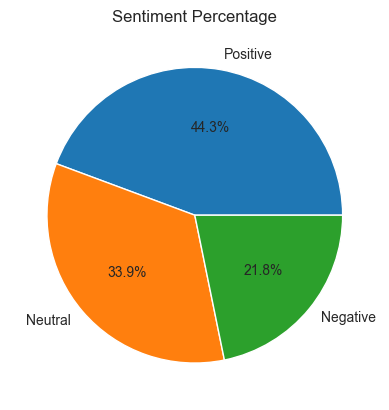

In [6]:
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Percentage")
plt.ylabel('')
plt.show()


Create Keyword Dictionary

In [7]:
sports_keywords = ['match', 'team', 'cricket', 'football', 'goal', 'tournament']
politics_keywords = [
    # Government & system
    'government', 'govt', 'parliament', 'constitution', 'democracy',
    'minister', 'prime minister', 'president', 'cm', 'mp', 'mla',
    'cabinet', 'policy', 'bill', 'law', 'act', 'amendment',

    # Elections
    'election', 'vote', 'voting', 'voter', 'campaign', 'manifesto',
    'ballot', 'poll', 'booth', 'candidate', 'party', 'coalition',

    # Political issues
    'corruption', 'scam', 'protest', 'resignation', 'controversy',
    'debate', 'speech', 'press conference', 'allegation',
    'investigation', 'supreme court', 'court', 'judgment',

    # Economy & governance
    'budget', 'tax', 'inflation', 'economy', 'gdp',
    'subsidy', 'reform', 'public sector', 'privatization',

    # Security & national issues
    'defense', 'military', 'border', 'national security',
    'foreign policy', 'diplomacy', 'sanction',

    # Common political words
    'leader', 'administration', 'governance', 'authority',
    'regulation', 'rights', 'citizen', 'public'
]

tech_keywords = ['ai', 'software', 'app', 'technology', 'device', 'data']
entertainment_keywords = ['movie', 'film', 'music', 'actor', 'show']
business_keywords = ['market', 'stock', 'company', 'profit', 'economy']
print(df.columns)



Index(['clean_text', 'category', 'Sentiment'], dtype='str')


In [8]:
def categorize_topic(text):
    if pd.isna(text):
        return 'Other'

    text = str(text).lower()

    if any(word in text for word in politics_keywords):
        return 'Politics'
    elif any(word in text for word in sports_keywords):
        return 'Sports'
    elif any(word in text for word in tech_keywords):
        return 'Technology'
    elif any(word in text for word in entertainment_keywords):
        return 'Entertainment'
    elif any(word in text for word in business_keywords):
        return 'Business'
    else:
        return 'Other'
df['Topic'] = df['clean_text'].apply(categorize_topic)


This gives count of Topics

In [9]:
print(df['Topic'].value_counts())


Topic
Politics         79575
Other            54511
Technology       25808
Entertainment     1667
Sports            1163
Business           256
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)


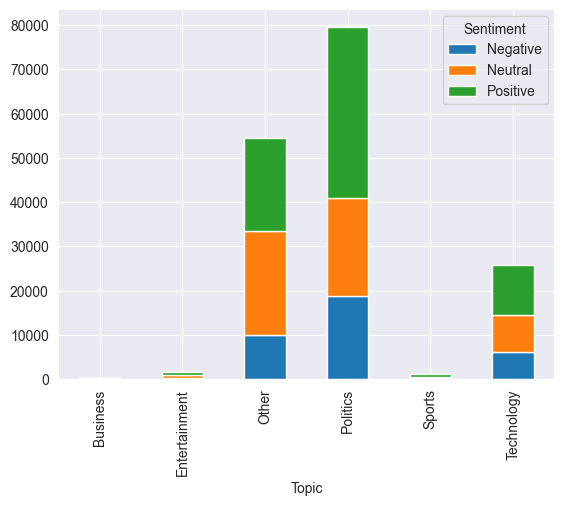

In [10]:
print(pd.crosstab(df['Topic'], df['Sentiment']).plot(kind='bar', stacked=True))
